In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
tweets_df = pd.read_csv('October 2022 Tweets.csv')

In [3]:
# Display the first few rows
print(tweets_df.head())


         Date                                              Tweet
0  2022-09-30  The most powerful word in my English vocabular...
1  2022-09-30  Tesla China Says Rumor of Model Y Price Cut Is...
2  2022-09-30  +$10,460 day trading $TSLA $SPYNew video / rec...
3  2022-09-30  The strong push for quarter end is happening. ...
4  2022-09-30  Tesla team is awesome, such an honor to work w...


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load FinBERT tokenizer and model
finbert_tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
finbert_model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Define the sentiment analysis function
def get_sentiment(tweet):
    try:
        inputs = finbert_tokenizer(tweet, return_tensors='pt', truncation=True, padding=True)
        outputs = finbert_model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        sentiment = torch.argmax(probabilities).item()  # 0: Negative, 1: Neutral, 2: Positive
        return sentiment
    except Exception as e:
        print(f"Error processing tweet: {tweet}\nError: {e}")
        return None

# Apply sentiment analysis to the tweets
tweets_df['Sentiment'] = tweets_df['Tweet'].apply(get_sentiment)

# Display the first few rows of tweets_df with sentiment
print(tweets_df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [2]:
# Required Libraries
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import matplotlib.pyplot as plt

In [6]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the FinBERT model
try:
    finbert_tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
    finbert_model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')
    print("FinBERT model loaded successfully.")
except Exception as e:
    print(f"Error loading FinBERT: {e}")


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

FinBERT model loaded successfully.


In [ ]:
# Step 3: Define Sentiment Analysis Function
def get_sentiment(tweet):
    try:
        inputs = finbert_tokenizer(tweet, return_tensors='pt', truncation=True, padding=True)
        outputs = finbert_model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        sentiment = torch.argmax(probabilities).item()  # 0: Negative, 1: Neutral, 2: Positive
        return sentiment
    except Exception as e:
        print(f"Error processing tweet: {tweet}\nError: {e}")
        return None

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification

# Authenticate with the token
TOKEN = "<CCT-CAPSTONE-sbs23096n>"
finbert_tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert', use_auth_token=TOKEN)
finbert_model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert', use_auth_token=TOKEN)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2077: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:3479: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


In [10]:
def get_sentiment(tweet):
    try:
        # Tokenize and prepare the tweet input
        inputs = finbert_tokenizer(tweet, return_tensors='pt', truncation=True, padding=True)
        # Run the input through the model
        outputs = finbert_model(**inputs)
        # Get logits (model output before softmax)
        logits = outputs.logits
        # Convert logits to probabilities
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        # Get the sentiment class (0: Negative, 1: Neutral, 2: Positive)
        sentiment = torch.argmax(probabilities).item()
        return sentiment
    except Exception as e:
        print(f"Error processing tweet: {tweet}\nError: {e}")
        return None


In [11]:
# Step 4: Apply Sentiment Analysis to Tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_sentiment)
print("Sentiment analysis applied to dataset.")

Sentiment analysis applied to dataset.


In [12]:
# Step 5: Aggregate Sentiments by Date
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])
daily_sentiment = tweets_df.groupby('Date')['sentiment'].mean().reset_index(name='Average Sentiment')


In [13]:
# Preview Daily Sentiment
print(daily_sentiment.head())

        Date  Average Sentiment
0 2022-09-30           1.725806
1 2022-10-01           1.798193
2 2022-10-02           1.692308
3 2022-10-03           1.649746
4 2022-10-04           1.725768


In [14]:
# Step 6: Merge with Tesla Stock Prices
# Ensure stock prices are loaded
stock_df = pd.read_csv("Tesla Stock Price.csv")  # Replace with your stock data file
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [15]:
# Merge stock and sentiment data
merged_data = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')

In [18]:
# Display the first few rows
print(stock_df.head())

        Date Close/Last     Volume      Open       High      Low
0 2023-10-03    $246.53  101985300   $248.61    $250.02  $244.45
1 2023-10-02    $251.60  123810400   $244.81  $254.2799  $242.62
2 2023-09-29    $250.22  128522700   $250.00    $254.77  $246.35
3 2023-09-28    $246.38  117058900   $240.02    $247.55  $238.65
4 2023-09-27    $240.50  136597200  $244.262    $245.33  $234.58


In [19]:
#Convert 'Close/Last' to numeric
merged_data['Close/Last'] = merged_data['Close/Last'].replace({'\$': ''}, regex=True).astype(float)

#Confirm conversion
print(merged_data['Close/Last'].head())

# Step 7: Correlation Analysis
correlation = merged_data['Average Sentiment'].corr(merged_data['Close/Last'])
print(f"Correlation between sentiment and Tesla stock price: {correlation}")


0    246.38
1    240.50
2    244.12
3    246.99
4    244.88
Name: Close/Last, dtype: float64
Correlation between sentiment and Tesla stock price: -0.04341837656139368


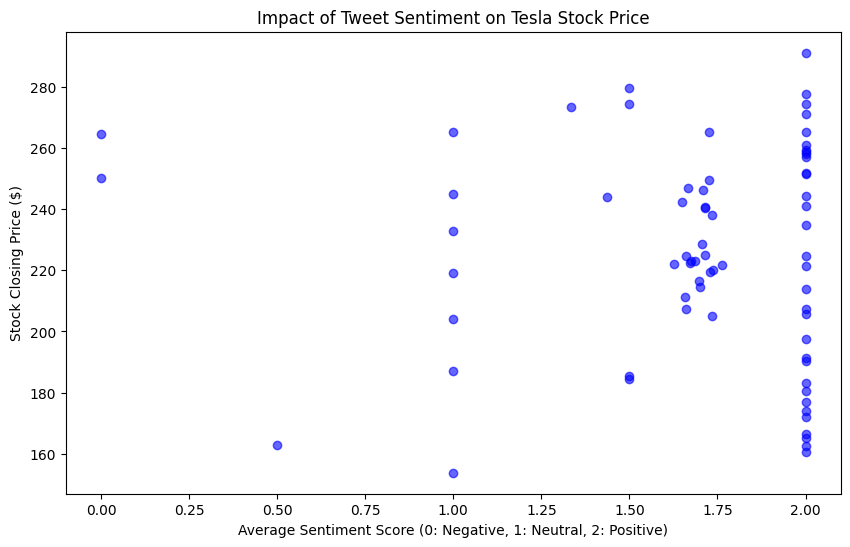

In [22]:
# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Average Sentiment'], merged_data['Close/Last'], color='blue', alpha=0.6)
plt.title('Impact of Tweet Sentiment on Tesla Stock Price')
plt.xlabel('Average Sentiment Score (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Stock Closing Price ($)')
plt.show()

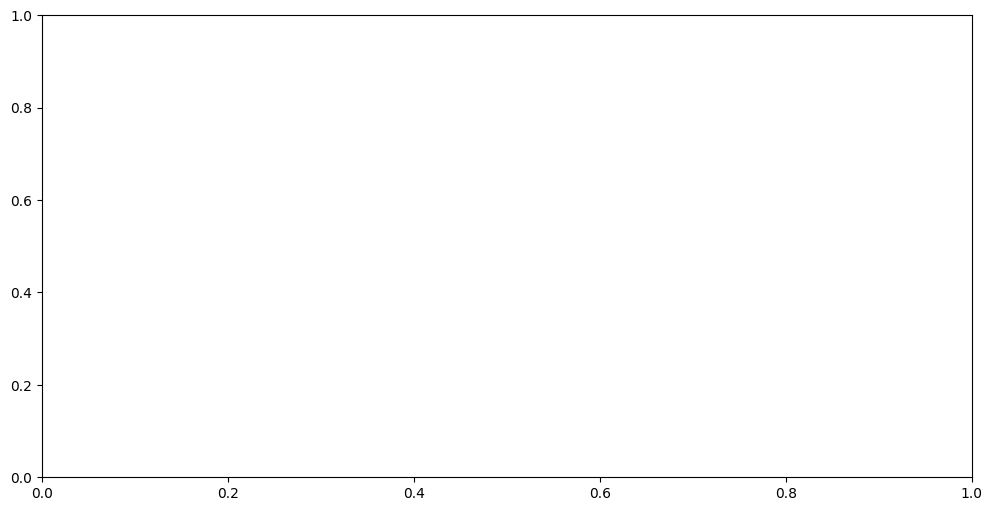

In [23]:
# Step 9: Plot Sentiment and Stock Price Over Time
fig, ax1 = plt.subplots(figsize=(12, 6))

In [24]:
# Stock Price
ax1.plot(merged_data['Date'], merged_data['Close/Last'], color='blue', label='Stock Price ($)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

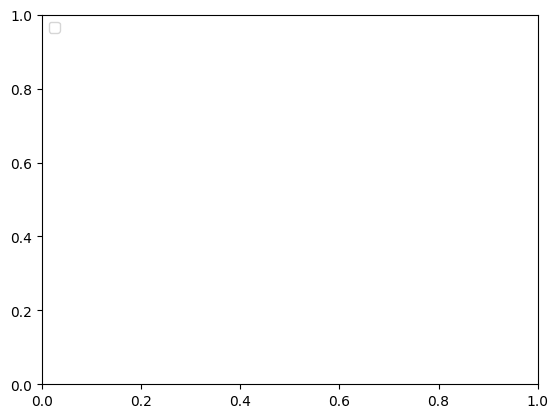

In [25]:
# Sentiment
ax2 = ax1.twinx()
ax2.plot(merged_data['Date'], merged_data['Average Sentiment'], color='red', label='Average Sentiment', linestyle='--')
ax2.set_ylabel('Average Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Tesla Stock Price and Tweet Sentiment Over Time')
plt.legend(loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Evaluation code

Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.06      0.10      3509
     Neutral       0.34      0.17      0.22      3562
    Positive       0.33      0.78      0.47      3458

    accuracy                           0.33     10529
   macro avg       0.33      0.34      0.26     10529
weighted avg       0.33      0.33      0.26     10529



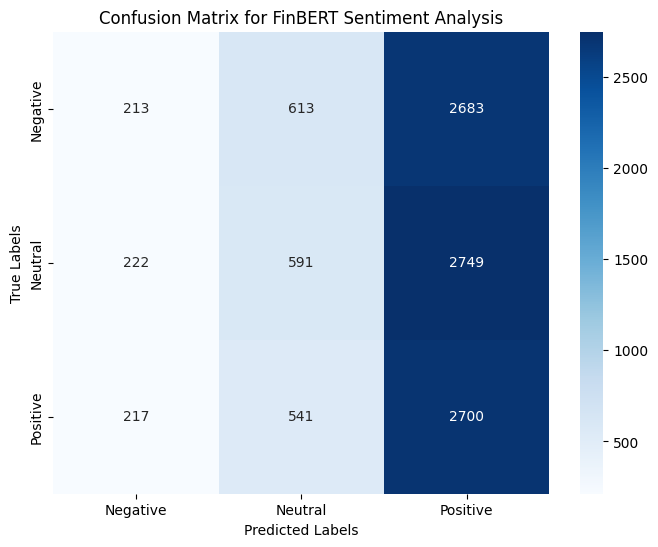

In [29]:
import random

# Generate random true sentiment labels for testing (0: Negative, 1: Neutral, 2: Positive)
tweets_df['true_sentiment'] = [random.choice([0, 1, 2]) for _ in range(len(tweets_df))]

# Re-run the evaluation code
true_labels = tweets_df['true_sentiment'].astype(int)
predicted_labels = tweets_df['sentiment'].astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for FinBERT Sentiment Analysis")
plt.show()


In [30]:
# Verify that true_sentiment and sentiment columns are present
if 'true_sentiment' not in tweets_df.columns:
    raise ValueError("The dataset must include a 'true_sentiment' column for evaluation.")


Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.06      0.10      3509
     Neutral       0.34      0.17      0.22      3562
    Positive       0.33      0.78      0.47      3458

    accuracy                           0.33     10529
   macro avg       0.33      0.34      0.26     10529
weighted avg       0.33      0.33      0.26     10529

Accuracy: 0.33


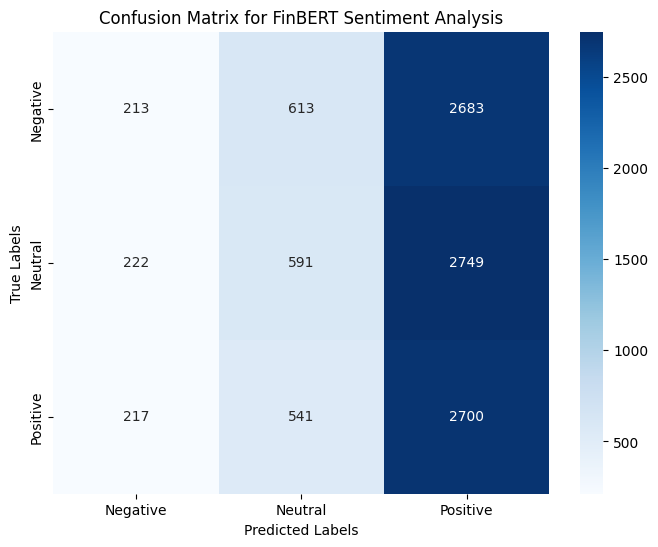

In [31]:
if 'sentiment' not in tweets_df.columns:
    raise ValueError("The dataset must include a 'sentiment' column with FinBERT predictions.")

# Step 1: Prepare True and Predicted Labels
true_labels = tweets_df['true_sentiment'].astype(int)  # Ground truth
predicted_labels = tweets_df['sentiment'].astype(int)  # FinBERT predictions

# Step 2: Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Negative", "Neutral", "Positive"]))

# Step 3: Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Step 4: Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for FinBERT Sentiment Analysis")
plt.show()
